In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [2]:
day_df = pd.read_csv('D:/Latihan Data Analyst/Dataset/bike sharing/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Cek apakah terdapat missing value atau duplicate dataa pada dataset

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
day_df.duplicated().sum()

0

In [5]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Dapat dilihat bahwa tipe data pada day.csv memiliki karakteristik yang tidak sesuai.

Karakteristik data pada dataset ini yang sesuai adalah

Bday.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Jadi, tipe data pada dataset tersebut harus dibuat sesuai dengan karakteristik dari data tersebut.

In [6]:
day_df['instant'] = day_df['instant'].apply(str)

In [7]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [8]:
day_df.season.replace(1, 'Spring', inplace=True)
day_df.season.replace(2, 'Summer', inplace=True)
day_df.season.replace(3, 'Fall', inplace=True)
day_df.season.replace(4, 'Winter', inplace=True)

In [9]:
day_df.yr.replace(0, '2011', inplace=True)
day_df.yr.replace(1, '2012', inplace=True)

In [10]:
day_df['mnth'] = day_df['mnth'].astype('str')

In [11]:
day_df.holiday.replace(0, 'Non Holiday', inplace=True)
day_df.holiday.replace(1, 'Holiday', inplace=True)

In [12]:
day_df.workingday.replace(0, 'Non-Working Day', inplace=True)
day_df.workingday.replace(1, 'Working Day', inplace=True)

In [13]:
day_df.weathersit.replace(1, 'Clear', inplace=True)
day_df.weathersit.replace(2, 'Mist', inplace=True)
day_df.weathersit.replace(3, 'Light Precipitation', inplace=True)
day_df.weathersit.replace(4, 'Heavy Precipitation', inplace=True)

In [14]:
day_df.weekday.replace(0, 'Sunday', inplace=True)
day_df.weekday.replace(1, 'Monday', inplace=True)
day_df.weekday.replace(2, 'Tuesday', inplace=True)
day_df.weekday.replace(3, 'Wednesday', inplace=True)
day_df.weekday.replace(4, 'Thursday', inplace=True)
day_df.weekday.replace(5, 'Friday', inplace=True)
day_df.weekday.replace(6, 'Saturday', inplace=True)

In [15]:
day_df['temp'] = day_df['temp'] * 100
day_df['temp'] = day_df['temp'].astype(int)
day_df['atemp'] = day_df['atemp'] * 100
day_df['atemp'] = day_df['atemp'].astype(int)
day_df['hum'] = day_df['hum'] * 100
day_df['hum'] = day_df['hum'].astype(int)
day_df['windspeed'] = day_df['windspeed'] * 100
day_df['windspeed'] = day_df['windspeed'].astype(int)

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    object        
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    int32         
 10  atemp       731 non-null    int32         
 11  hum         731 non-null    int32         
 12  windspeed   731 non-null    int32         
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), int3

In [17]:
day_df.describe(include='all')

C:\Users\Hp\AppData\Local\Temp\ipykernel_14916\1011100427.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,731,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1,2011-01-01 00:00:00,Fall,2012,1,Non Holiday,Saturday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.083447,46.943912,62.306430,18.562244,848.176471,3656.172367,4504.348837
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.305771,16.296176,14.242776,7.750556,686.622488,1560.256377,1937.211452
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,7.000000,0.000000,2.000000,2.000000,20.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,33.000000,52.000000,13.000000,315.500000,2497.000000,3152.000000


In [18]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,Non Holiday,Saturday,Non-Working Day,Mist,34,36,80,16,331,654,985
1,2,2011-01-02,Spring,2011,1,Non Holiday,Sunday,Non-Working Day,Mist,36,35,69,24,131,670,801
2,3,2011-01-03,Spring,2011,1,Non Holiday,Monday,Working Day,Clear,19,18,43,24,120,1229,1349
3,4,2011-01-04,Spring,2011,1,Non Holiday,Tuesday,Working Day,Clear,20,21,59,16,108,1454,1562
4,5,2011-01-05,Spring,2011,1,Non Holiday,Wednesday,Working Day,Clear,22,22,43,18,82,1518,1600


Selanjutnya adalah tahap EDA

Kasus yang terdapat pada dataset ini adalah sistem penyewaan sepeda. Beberapa pertanyaan yang dapat diajukan untuk kasus ini adalah sebagai berikut:
1. Bagaimana sewa sepeda dalam beberapa bulan terakhir?
2. Bagaimana korelasi antara musim (season) dengan jumlah total sepeda yang disewa?
3. Bagaimana cuaca memengaruhi jumlah sepeda yang disewa?
4. Bagaimana hubungan hari libur dan jumlah sepeda yang disewa?
5. Bagaimana korelasi antara weekend (sunday) dan hari biasa pada jumlah sepeda yang disewa?

Explorasi Data

In [19]:
day_df.describe(include='all')

C:\Users\Hp\AppData\Local\Temp\ipykernel_14916\1011100427.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,731,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1,2011-01-01 00:00:00,Fall,2012,1,Non Holiday,Saturday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.083447,46.943912,62.306430,18.562244,848.176471,3656.172367,4504.348837
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.305771,16.296176,14.242776,7.750556,686.622488,1560.256377,1937.211452
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,7.000000,0.000000,2.000000,2.000000,20.000000,22.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,33.000000,52.000000,13.000000,315.500000,2497.000000,3152.000000


In [20]:
day_df.groupby(by='season').instant.nunique().sort_values(ascending=False)

season
Fall      188
Summer    184
Spring    181
Winter    178
Name: instant, dtype: int64

Berdasarkan hasil di atas, persebaran data yang digunakan cukup merata pada masing-masing musim.

In [21]:
day_df.groupby(by='weathersit').instant.nunique().sort_values(ascending=False)

weathersit
Clear                  463
Mist                   247
Light Precipitation     21
Name: instant, dtype: int64

Persebaran data pada hasil di atas mencerminkan seberapa sering masing-masing kondisi cuaca terjadi. Dari data tersebut dapat dilihat kondisi cuara lebih sering "Clear" sebanyak 463 kali, "Mist" sebanyak 247 kali, "Light Precipitation" sebanyak 21 kali, dan tidak pernah terjadi "Heavy Precipitation".

In [22]:
day_df.groupby(by='weekday').instant.nunique().sort_values(ascending=False)

weekday
Monday       105
Saturday     105
Sunday       105
Friday       104
Thursday     104
Tuesday      104
Wednesday    104
Name: instant, dtype: int64

Data di atas memperlihatkan total masing-masing hari yang ada pada dataset.

In [23]:
day_df.groupby(by='holiday').instant.nunique().sort_values(ascending=False)

holiday
Non Holiday    710
Holiday         21
Name: instant, dtype: int64

Data di atas menunjukan total "Holiday" dan "Non Holiday" pada dataset

In [24]:
day_df.groupby(by='season').agg({
    'instant': 'nunique',
    'windspeed': ['max', 'min', 'mean', 'std'],
    'cnt' : ['sum']
})

instant windspeed                               cnt
       nunique       max min       mean       std      sum
season                                                    
Fall       188        37   6  16.728723  5.949504  1061129
Spring     181        50   4  20.977901  8.647386   471348
Summer     184        38   6  19.847826  7.177583   918589
Winter     178        42   2  16.713483  8.145703   841613

Data di atas menunjukan korelasi antara musim, kecepatan angin, dengan jumlah total sepeda yang disewa.

In [25]:
day_df.groupby(by='weathersit').agg({
    'instant': 'nunique',
    'windspeed': ['max', 'min', 'mean', 'std'],
    'cnt' : ['sum']
})

instant windspeed                               cnt
                    nunique       max min       mean       std      sum
weathersit                                                             
Clear                   463        50   2  18.544276  7.755021  2257952
Light Precipitation      21        35   9  23.809524  8.704131    37869
Mist                    247        41   4  18.149798  7.525420   996858

Data di atas menunjukan korelasi antara kondisi cuaca, kecepatan angin, dan total sepeda yang disewa.

In [26]:
day_df.groupby(by='weekday').agg({
    'instant': 'nunique',
    'windspeed': ['max', 'min', 'mean', 'std'],
    'cnt' : ['sum']
})

instant windspeed                              cnt
          nunique       max min       mean       std     sum
weekday                                                     
Friday        104        41   2  18.144231  7.446141  487790
Monday        105        41   4  18.552381  8.356229  455503
Saturday      105        50   4  19.180952  8.134425  477807
Sunday        105        40   5  18.380952  7.542675  444027
Thursday      104        44   4  18.663462  7.645813  485395
Tuesday       104        38   5  18.692308  7.601835  469109
Wednesday     104        41   6  18.317308  7.655526  473048

Data di atas menunjukan korelasi antara hari, kecepatan angin, dan jumlah sepeda yang disewa.

In [27]:
day_df.groupby(by='weekday').agg({
    'instant': 'nunique',
    'registered' : 'sum',
    'casual' : 'sum'
})

,instant,registered,casual
weekday,,,
Friday,104,409552,78238
Monday,105,384719,70784
Saturday,105,323955,153852
Sunday,105,303506,140521
Thursday,104,423935,61460
Tuesday,104,411266,57843
Wednesday,104,415729,57319


Data di atas menunjukan total pengguna terdaftar (registered) dan total pengguna acak (casual) setiap harinya.

Data Visualization

1. Bagaimana sewa sepeda dalam beberapa bulan terakhir?

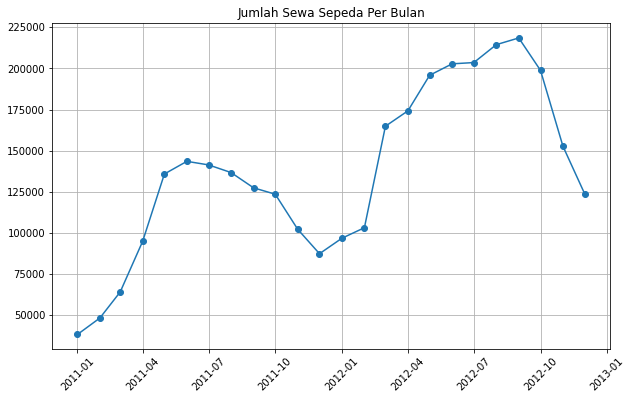

In [28]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
monthly_data = day_df.groupby(day_df['dteday'].dt.to_period("M")).sum()
monthly_data.index = monthly_data.index.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['cnt'], marker='o', linestyle='-')
plt.title('Jumlah Sewa Sepeda Per Bulan')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

2. Bagaimana korelasi antara musim (season) dan jumlah total sepeda yang disewa?

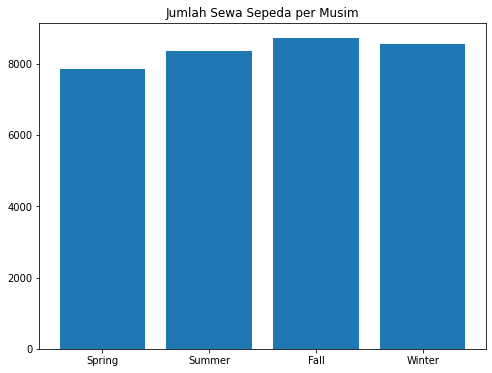

In [29]:
seasons = day_df['season']
total_counts = day_df['cnt']

# Membuat bar plot
plt.figure(figsize=(8, 6))
plt.bar(seasons, total_counts)
plt.title('Jumlah Sewa Sepeda per Musim')
plt.show()

3. Bagaimana cuaca memengaruhi jumlah sepeda yang disewa?

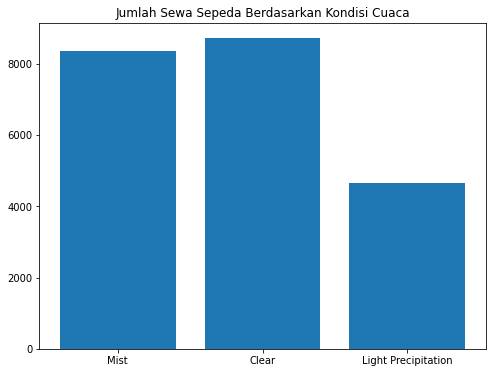

In [30]:
weather_situation = day_df['weathersit']
total_counts = day_df['cnt']

# Membuat bar plot
plt.figure(figsize=(8, 6))
plt.bar(weather_situation, total_counts)
plt.title('Jumlah Sewa Sepeda Berdasarkan Kondisi Cuaca')
plt.show()

4. Bagaimana hubungan hari libur dan jumlah sepeda yang disewa?

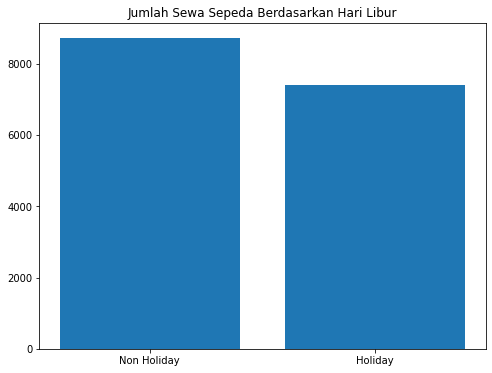

In [31]:
holiday = day_df['holiday']
total_counts = day_df['cnt']

# Membuat bar plot
plt.figure(figsize=(8, 6))
plt.bar(holiday, total_counts)
plt.title('Jumlah Sewa Sepeda Berdasarkan Hari Libur')
plt.show()

5. Bagaimana korelasi antara weekend (sunday) dan hari biasa pada jumlah sepeda yang disewa?

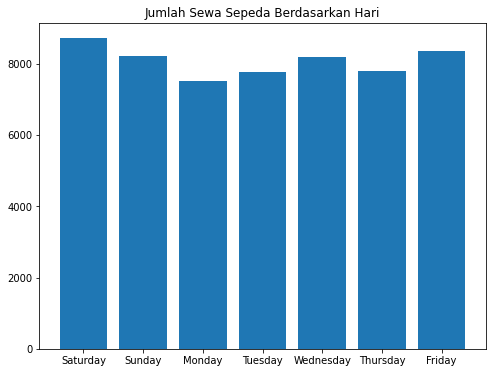

In [32]:
days = day_df['weekday']
total_counts = day_df['cnt']

# Membuat bar plot
plt.figure(figsize=(8, 6))
plt.bar(days, total_counts)
plt.title('Jumlah Sewa Sepeda Berdasarkan Hari')
plt.show()

In [33]:
day_df.to_csv("day_df_data.csv", index=False)